In [1]:
# Import neccessary Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Dataset
dataset = pd.read_csv('Data.csv')

In [3]:
# Applying one-hot encoading
dataset = pd.get_dummies(dataset,drop_first=True)
dataset

,Age,Salary,Country_Germany,Country_Spain,Purchased_Yes
0,44.0,72000.0,False,False,False
1,27.0,48000.0,False,True,True
2,30.0,54000.0,True,False,False
3,38.0,61000.0,False,True,False
4,40.0,NaN,True,False,True
5,35.0,58000.0,False,False,True
6,NaN,52000.0,False,True,False
7,48.0,79000.0,False,False,True
8,50.0,83000.0,True,False,False
9,37.0,67000.0,False,False,True


In [4]:
# Finding any null values in the dataset
dataset.isnull().sum()

Age                1
Salary             1
Country_Germany    0
Country_Spain      0
Purchased_Yes      0
dtype: int64

In [5]:
# Applying mean values to null
dataset["Salary"].fillna(dataset["Salary"].mean(),inplace=True)
dataset["Age"].fillna(dataset["Age"].mean(),inplace=True)
dataset

,Age,Salary,Country_Germany,Country_Spain,Purchased_Yes
0,44.000000,72000.000000,False,False,False
1,27.000000,48000.000000,False,True,True
2,30.000000,54000.000000,True,False,False
3,38.000000,61000.000000,False,True,False
4,40.000000,63777.777778,True,False,True
5,35.000000,58000.000000,False,False,True
6,38.777778,52000.000000,False,True,False
7,48.000000,79000.000000,False,False,True
8,50.000000,83000.000000,True,False,False
9,37.000000,67000.000000,False,False,True


In [6]:
# To check the null values are correctly applied or if any other null values are there
dataset.isnull().sum()

Age                0
Salary             0
Country_Germany    0
Country_Spain      0
Purchased_Yes      0
dtype: int64

In [7]:
# Checking the column type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              10 non-null     float64
 1   Salary           10 non-null     float64
 2   Country_Germany  10 non-null     bool   
 3   Country_Spain    10 non-null     bool   
 4   Purchased_Yes    10 non-null     bool   
dtypes: bool(3), float64(2)
memory usage: 322.0 bytes


In [8]:
# Changing the columns type to corresponding data type
dataset['Age'] = dataset['Age'].astype('int64')
dataset['Salary'] = dataset['Salary'].astype('int64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              10 non-null     int64
 1   Salary           10 non-null     int64
 2   Country_Germany  10 non-null     bool 
 3   Country_Spain    10 non-null     bool 
 4   Purchased_Yes    10 non-null     bool 
dtypes: bool(3), int64(2)
memory usage: 322.0 bytes


In [9]:
dataset

,Age,Salary,Country_Germany,Country_Spain,Purchased_Yes
0,44,72000,False,False,False
1,27,48000,False,True,True
2,30,54000,True,False,False
3,38,61000,False,True,False
4,40,63777,True,False,True
5,35,58000,False,False,True
6,38,52000,False,True,False
7,48,79000,False,False,True
8,50,83000,True,False,False
9,37,67000,False,False,True


In [10]:
dataset.describe()

,Age,Salary
count,10.000000,10.000000
mean,38.700000,63777.700000
std,7.257946,11564.099408
min,27.000000,48000.000000
25%,35.500000,55000.000000
50%,38.000000,62388.500000
75%,43.000000,70750.000000
max,50.000000,83000.000000


In [11]:
# Segrigate Quan & Qual columns
qual=[]
quan=[]
for columnname in dataset:
    if (dataset[columnname].dtype =='int64'):
        quan.append(columnname)
    else:
        qual.append(columnname)

In [12]:
quan

['Age', 'Salary']

In [13]:
qual

['Country_Germany', 'Country_Spain', 'Purchased_Yes']

In [14]:
# Mean, Median, Mode should frame as a column and want display the data like as a table format of structure, so using DataFrame function
desc = pd.DataFrame(index=["Mean","Median","Mode"])
desc

""
Mean
Median
Mode


In [15]:
desc = pd.DataFrame(index=["Mean","Median","Mode"],columns=quan)
desc

,Age,Salary
Mean,NaN,NaN
Median,NaN,NaN
Mode,NaN,NaN


In [16]:
Descriptive = pd.DataFrame(index=["Mean","Median","Mode"],columns=quan)
for columnname in quan:
    Descriptive[columnname]["Mean"] = dataset[columnname].mean()
    Descriptive[columnname]["Median"] = dataset[columnname].median()
    Descriptive[columnname]["Mode"] = dataset[columnname].mode() [0]
Descriptive

,Age,Salary
Mean,38.7,63777.7
Median,38.0,62388.5
Mode,38,48000


In [21]:
# Percentile

dataset.describe()

,Age,Salary
count,10.000000,10.000000
mean,38.700000,63777.700000
std,7.257946,11564.099408
min,27.000000,48000.000000
25%,35.500000,55000.000000
50%,38.000000,62388.500000
75%,43.000000,70750.000000
max,50.000000,83000.000000


In [23]:
Descriptive = pd.DataFrame(index=["Mean","Median","Mode",'25%','50%','75%','100%'],columns=quan)
for columnname in quan:
    Descriptive[columnname]["Mean"] = dataset[columnname].mean()
    Descriptive[columnname]["Median"] = dataset[columnname].median()
    Descriptive[columnname]["Mode"] = dataset[columnname].mode() [0]
    Descriptive[columnname]["25%"] = dataset.describe()[columnname]["25%"]
    Descriptive[columnname]["50%"] = dataset.describe()[columnname]["50%"]
    Descriptive[columnname]["75%"] = dataset.describe()[columnname]["75%"]
    Descriptive[columnname]["100%"] = dataset.describe()[columnname]["max"]
Descriptive

,Age,Salary
Mean,38.7,63777.7
Median,38.0,62388.5
Mode,38,48000
25%,35.5,55000.0
50%,38.0,62388.5
75%,43.0,70750.0
100%,50.0,83000.0


In [24]:
# InterQuatile Range (IQR)

descriptive = pd.DataFrame(index=["Mean","Median","Mode","25%","50%","75%","100%","IQR","1.5rule","Min","Lesser","Max","Greater"],columns=quan)
for columnname in quan:
    descriptive[columnname]["Mean"] = dataset[columnname].mean()
    descriptive[columnname]["Median"] = dataset[columnname].median()
    descriptive[columnname]["Mode"] = dataset[columnname].mode() [0]
    descriptive[columnname]["25%"] = dataset.describe()[columnname]["25%"]
    descriptive[columnname]["50%"] = dataset.describe()[columnname]["50%"]
    descriptive[columnname]["75%"] = dataset.describe()[columnname]["75%"]
    descriptive[columnname]["100%"] = dataset.describe()[columnname]["max"]
    descriptive[columnname]["IQR"] = descriptive[columnname]["75%"] - descriptive[columnname]["25%"]
    descriptive[columnname]["1.5rule"] = 1.5*descriptive[columnname]["IQR"]
    descriptive[columnname]["Min"] = dataset.describe()[columnname]["min"] # take the min value from the dataset
    descriptive[columnname]["Lesser"] = descriptive[columnname]["25%"] - descriptive[columnname]["1.5rule"]
    descriptive[columnname]["Max"] = dataset.describe()[columnname]["max"] # take the max value from the dataset
    descriptive[columnname]["Greater"] = descriptive[columnname]["75%"] + descriptive[columnname]["1.5rule"]

In [25]:
descriptive

,Age,Salary
Mean,38.7,63777.7
Median,38.0,62388.5
Mode,38,48000
25%,35.5,55000.0
50%,38.0,62388.5
75%,43.0,70750.0
100%,50.0,83000.0
IQR,7.5,15750.0
1.5rule,11.25,23625.0
Min,27.0,48000.0


In [26]:
# Find -> Min > Lesser and Max < Greater

In [27]:
descriptive["Salary"]["Min"] < descriptive["Salary"]["Lesser"]

False

In [28]:
Lesser=[]
Greater=[]
for columnname in quan:
    if(descriptive[columnname]["Min"] < descriptive[columnname]["Lesser"]):
        Lesser.append(columnname)
    if(descriptive[columnname]["Max"] > descriptive[columnname]["Greater"]):
        Greater.append(columnname)

In [29]:
Lesser

[]

In [30]:
Greater

[]

In [31]:
# Frequency

In [33]:
dataset["Salary"].value_counts()

Salary
72000    1
48000    1
54000    1
61000    1
63777    1
58000    1
52000    1
79000    1
83000    1
67000    1
Name: count, dtype: int64

In [34]:
def Frequency (columnname):
    Frequency = pd.DataFrame(columns=["Unique_Values","Freq","Related Freq","CumFreq"])
    Frequency["Unique_Values"] = dataset[columnname].value_counts().index
    Frequency["Freq"] = dataset[columnname].value_counts().values
    Frequency["Related Freq"] = Frequency["Freq"]/103
    Frequency["CumFreq"] = Frequency["Related Freq"].cumsum()
    return Frequency
Frequency (columnname)

,Unique_Values,Freq,Related Freq,CumFreq
0,72000,1,0.009709,0.009709
1,48000,1,0.009709,0.019417
2,54000,1,0.009709,0.029126
3,61000,1,0.009709,0.038835
4,63777,1,0.009709,0.048544
5,58000,1,0.009709,0.058252
6,52000,1,0.009709,0.067961
7,79000,1,0.009709,0.077670
8,83000,1,0.009709,0.087379
9,67000,1,0.009709,0.097087


In [35]:
# Skewness & Kurtosis

In [39]:
dataset["Salary"].skew()

0.40493769514056543

In [38]:
dataset["Salary"].kurtosis()

-0.8436614644615896

In [40]:
def Sknewss_Kurtosis(descriptive):
    descriptive = pd.DataFrame(index=["Mean","Median","Mode","25%","50%","75%","100%","IQR","1.5rule","Min","Lesser","Max","Greater","Skew","Kurt"],columns=quan)
    for columnname in quan:
        descriptive[columnname]["Mean"] = dataset[columnname].mean()
        descriptive[columnname]["Median"] = dataset[columnname].median()
        descriptive[columnname]["Mode"] = dataset[columnname].mode() [0]
        descriptive[columnname]["25%"] = dataset.describe()[columnname]["25%"]
        descriptive[columnname]["50%"] = dataset.describe()[columnname]["50%"]
        descriptive[columnname]["75%"] = dataset.describe()[columnname]["75%"]
        descriptive[columnname]["100%"] = dataset.describe()[columnname]["max"]
        descriptive[columnname]["IQR"] = descriptive[columnname]["75%"] - descriptive[columnname]["25%"]
        descriptive[columnname]["1.5rule"] = 1.5*descriptive[columnname]["IQR"]
        descriptive[columnname]["Min"] = dataset.describe()[columnname]["min"] # take the min value from the dataset
        descriptive[columnname]["Lesser"] = descriptive[columnname]["25%"] - descriptive[columnname]["1.5rule"]
        descriptive[columnname]["Max"] = dataset.describe()[columnname]["max"] # take the max value from the dataset
        descriptive[columnname]["Greater"] = descriptive[columnname]["75%"] + descriptive[columnname]["1.5rule"]
        descriptive[columnname]["Skew"] = descriptive[columnname].skew()
        descriptive[columnname]["Kurt"] = descriptive[columnname].kurtosis()
    return descriptive

In [42]:
Sknewss_Kurtosis(descriptive)

,Age,Salary
Mean,38.7,63777.7
Median,38.0,62388.5
Mode,38,48000
25%,35.5,55000.0
50%,38.0,62388.5
75%,43.0,70750.0
100%,50.0,83000.0
IQR,7.5,15750.0
1.5rule,11.25,23625.0
Min,27.0,48000.0


In [43]:
# Variance & Deviation

In [45]:
dataset["Salary"].var()

133728395.12222221

In [46]:
dataset["Salary"].std()

11564.099408177975

In [47]:
def Variance_Deviation(descriptive):
    descriptive = pd.DataFrame(index=["Mean","Median","Mode","25%","50%","75%","100%","IQR","1.5rule","Min","Lesser","Max","Greater","Skew","Kurt","Var","Std"],columns=quan)
    for columnname in quan:
        descriptive[columnname]["Mean"] = dataset[columnname].mean()
        descriptive[columnname]["Median"] = dataset[columnname].median()
        descriptive[columnname]["Mode"] = dataset[columnname].mode() [0]
        descriptive[columnname]["25%"] = dataset.describe()[columnname]["25%"]
        descriptive[columnname]["50%"] = dataset.describe()[columnname]["50%"]
        descriptive[columnname]["75%"] = dataset.describe()[columnname]["75%"]
        descriptive[columnname]["100%"] = dataset.describe()[columnname]["max"]
        descriptive[columnname]["IQR"] = descriptive[columnname]["75%"] - descriptive[columnname]["25%"]
        descriptive[columnname]["1.5rule"] = 1.5*descriptive[columnname]["IQR"]
        descriptive[columnname]["Min"] = dataset.describe()[columnname]["min"] # take the min value from the dataset
        descriptive[columnname]["Lesser"] = descriptive[columnname]["25%"] - descriptive[columnname]["1.5rule"]
        descriptive[columnname]["Max"] = dataset.describe()[columnname]["max"] # take the max value from the dataset
        descriptive[columnname]["Greater"] = descriptive[columnname]["75%"] + descriptive[columnname]["1.5rule"]
        descriptive[columnname]["Skew"] = descriptive[columnname].skew()
        descriptive[columnname]["Kurt"] = descriptive[columnname].kurtosis()
        descriptive[columnname]["Var"] = descriptive[columnname].var()
        descriptive[columnname]["Std"] = descriptive[columnname].std()
    return descriptive

Variance_Deviation(descriptive)

,Age,Salary
Mean,38.7,63777.7
Median,38.0,62388.5
Mode,38,48000
25%,35.5,55000.0
50%,38.0,62388.5
75%,43.0,70750.0
100%,50.0,83000.0
IQR,7.5,15750.0
1.5rule,11.25,23625.0
Min,27.0,48000.0


<Axes: xlabel='Salary', ylabel='Density'>

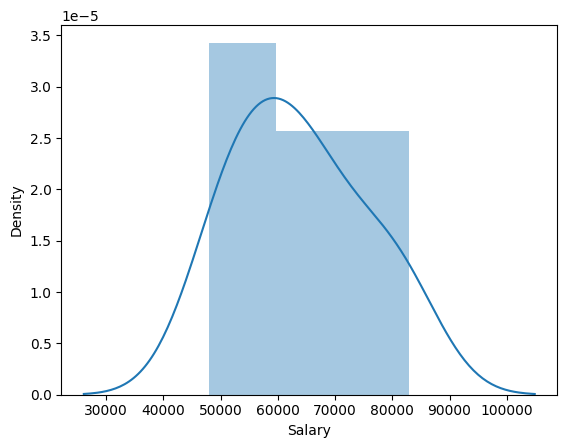

In [49]:
# Normal Distribution

# Seaborn library used for graph
import seaborn as sea
sea.distplot(dataset["Salary"])

In [50]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sea
    ax = sea.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    #generate sample
    sample = dataset
    #calculate parameters
    sample_mean = sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    #define the distibution
    dist = norm(sample_mean, sample_std)
    
    # sample probability for a range of outcomes
    values = np.arange(startrange,endrange,0.1)
    probability = [dist.pdf(value) for value in values]
    prob = sum(probability)
    print("The are between range ({},{}):{}".format(startrange,endrange,sum(probability)))
    return prob

Mean=63777.700, Standard Deviation=11564.099
The are between range (50000,70000):5.879907834755314


5.879907834755314

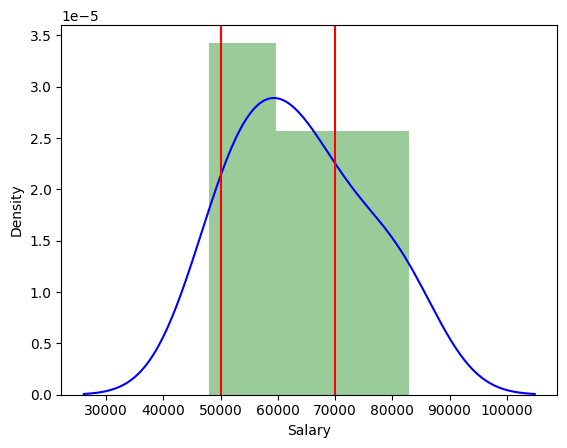

In [52]:
get_pdf_probability(dataset["Salary"],50000,70000)

In [53]:
# Cumulative Density Function

In [58]:
from statsmodels.distribution.empirical_disribution import ECDF
ecdf = ECDF(dataset["Salary"])
ecdf

ModuleNotFoundError: No module named 'statsmodels.distribution'

In [55]:
#!pip install statsmodels

In [57]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset["Salary"])
ecdf(80000)

0.9

In [59]:
# Standard Normal Deviation

In [60]:
def SND(dataset):
    import seaborn as sea
    mean = dataset.mean()
    std = dataset.std()
    values =[i for i in dataset]
    z_score = [((x-mean)/std) for x in values]
    sea.distplot(z_score,kde=True)

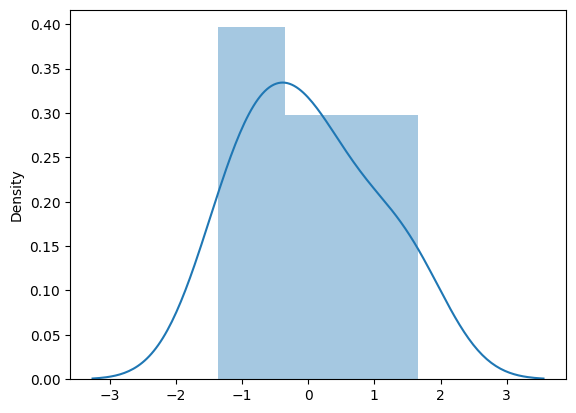

In [61]:
SND(dataset["Salary"])

In [1]:
# Future K Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
def selectkbest(inp,out,n):
        test = SelectKBest(score_func=chi2, k=n)
        fit1= test.fit(inp,out)
        selectk_features = fit1.transform(inp)
        return selectk_features